In [0]:
%pip install datasets==2.20.0 transformers==4.49.0 tf-keras==2.17.0 accelerate==1.4.0 mlflow==2.20.2 torchvision==0.20.1 deepspeed==0.14.4
dbutils.library.restartPython()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 61.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 38.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 155.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 116.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.4/28.4 MB 173.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 160.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 142.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.4/906.4 MB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 40.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 39.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━

In [0]:

training_df = spark.readStream.table("smart_claims_dev.02_silver.training_images")
display(training_df.limit(1))

path modificationTime length content label dbfs:/Volumes/smart_claims_dev/00_landing/training_imgs/22-minor (2).png 2025-08-10T09:04:15Z 1533565 List(iVBORw0KGgoAAAANSUhEUgAABAAAAAQACAIAAADwf7zUAAEAAElEQVR4nET9y86tW7YlBrXWeh9zrrUvcTKPjRFCFJCQQEJOZZJ2cjElKFHHQsZIBmMbyX4dCvAyCAlLgJDgNRA+58SJ2Je1/m+M3hqF8W87ijsi9lpzzu8bo/c= (truncated), iVBORw0KGgoAAAANSUhEUgAAAGQAAABkCAIAAAD/gAIDAABNCUlEQVR4Xm29B1BU6bf2S9WdZBhzQkXJAgIiYs4KgojknKNgzgEFA6AEwQBGVFTEQM45NE3OWcw5jKOT/+fcc79b9dW5z1rvbvT/3UOt2rPFBrt//Twr7H7fPUpFZVX1LZ2tXf1d/Y96B5/2PHzc1tVbVllz605azOn4Hbv3eHr7rLOwWGNqamax3tbeMSAo+OiJqCvXbxaWVfYMPH79/pePv/72+fc/Kf7gI8en3/745cvvHz//9uHTl/e//Prul1/ffvz05uOn1x9+wY+8ev/x1btfXr77+PLtxxdvPjx//f7Z63fPXr178vLt05dvn7x48/j560fPXg0+ffnw6Yv+J8/7Hz3j5/ake+BxZ/+jzj7EYEfPw7bugbbu/pbOvpaOXkRTe08joq27oa2robUTr6uupVPe3FmLaOqobeyQNXbUNHTIGtpr6tur6tsq5YjWCnlreW1LeW1zmawFUVrTXFrTVFLTVFrdVFLVVFzVVFTZWFjZUFjRoLR1+65KeXNtUzv+gcb27qbO3tbu/raeATwhPLPuh4/7Hj3rf/y8tauvpKLmXmbO5eQbESejt+3Y5ejsam6x3sHRaev2nTFxp+/cvS+TNww+fvbxE1j99ceff//+x184+e0PxJ9fJI5/AOKnz3/88vl3IGaOn999/PXth09vQBDs3n148fbD8zfvnzM7Bvf20fPXg89A7eXAkxd4Jn0SuKcEru9RR99gO6j1MLUuBtfZ19zR8xVca3ddS1ddM4W8qbO2sau2sVPWAGrt1fUd1fXtlXVtzKu1opapEbLmMiCrJmTFCl5FlQ1KK1etTU65UyZrqmlsk7d01Ld2SdQ6elo6e/EPg11H78PO/sGugUdg1zv4pO/xs0fPXz1+8RoaLK+S3U67fzrh3OGwo/4BQc6u7vb2TsHBW4+fOHntekpxSXl3T+/HT7/+/c+//vnXf/yN+Odff/39rz//+uePP//5/c+/gZJk+IXwCXZvid2vEru3H168gejeP3319gkrDuD+f9RIbl39jzv6HrX3MDiS2wC80tLV19zZ19TR29je19DW09DaU98iwHXLgaypU0bUOqsbOioZmVBZBamMeLHEmkuArBq8GhFKi5csX7fOIqugrELeXNPQBmRQWV1zBzTcIMDhXersaeqC4vraewba+x529BE7PEUC9+jpwJPnYActwF/vfvn88s271o6uguLSq9dvHo84uW37Lg9Pb3d3z92798bExN1MuVlSUtLc3PL8xSso7ncS4N+///nPb3/8/dvvf3/5/a9ff/vz1y9/fGR2+G1vPvyKXwvDvlCAA7VHL94MMrV+pgaT9rDWumAFlhtM2tkrgWvtHoDimjv7mzr6Gtt7G9p6G1p761t665p75E3dtU1dssaumsbOajKmpDKWWKvCkhIvWFJp6bIVixYtcfPwKq5qqKhtrqxrrm5oBTVZYzuo1Ta3s9w665EFSG69eLuET0lueE4Dj3rIqk8fPnkx+OwF5AYVwEfQBcyFbPXh0+ePv34BwZaOzsLi0pTbqQlnz4ceCd8UssXT0zswKHjf/gMxcfHXU27l5BXUNzb3Dz6GrCA0YdX3n75Aa28+ULJjZB+fv/kgsttjIHv2evDpK0ENeh+yJ2uNUlt770O8wWxSIBsgZO39jW19CEbWU9fSI2/uljV11jR2QGIKV7aVszGHJCZ4Kbm4uBrNnbdw4aIj4SdKqhrKZI0VtU1AVlnXUl3fWtNIIWtqq23uIGrk0B4ga+5ESNTayaSU4HoGn/Q+fgahPXz2Ehn66cs3kNvLNx9ev/v45sMveM0A9+nLb59/+/3L738gi3368vujJ88aGpsLikpupNyKTzgfFn5sU8hmdw8Pbx+/LVu37T948GRMLBSalVtQKavrQEF5/ubZ6w9PX71/+vLdY3YleD189mpA4vW8FyojY1LAm3g7iVfvYFv3YCui62FL58PmjgFC1t4PldW39oJXLfFifX3Di5Ap9FVSTaEUGBBgaWllZGS8aNGipMs3iirqSqqBrKmstqlcLqg1V9e3VEvI2utaOlBoGtq6KX129DRDa6Im9A4ga8AIeK7Cm6hlQIZE8wxae/0OVe/V2w/wFMrie8jt82+AhZQPM6Ia/PXXP8hlf/39z5ff//wFSnz1trtvoKGxJTsn7+LFy5GRkbt27/bx9XVydnZz9/QPCt65Z//RiKiE8xdv3LqblV9cJW/Cc4CsegafdUuwpLrZQX4EqYeA1QJY3/BSWLJHTvrqGuLFfuxgWG1lta0KMzYrbQ4J9vPzW7lytbGxyZo1a9Iy8gvKaosr60uq65lafXkt7NlYKW+qqieHylAHGFkdvPm1GnQ3EzISvECGZ9w7SGV08NmrksqaKnkjVEAOBbW3H16R1j69I619YWpA9tcfzOvvf/4DpeBf//Gf/3D8/a//xPc///bHh19+ff32/bOXr/r6B2W19Tl5+ddu3Iw7HX/o8OHAoE0urm7WtrY29g6uHl5Bm7fuCw2LiolPunI99X5mfkklnnMTSmQnbDjQgiNIdZCyWFx9JK5W8Oqube6qaRKwOqrq2ivq2svlbaVQlqylRMBydnIIDAzw9vZetGjx/PnzXVzdswor80plBeXyoso6RHF1fWkN2bOc7QlkNQ2ttY2ttU1tckRzB4PrALUm8iaSWj8SBJSv8OZTlC34h5Ia1dA3SDfoqpDXXpLQPkJo7yiv/Ya8/oWR/QmJ/YO6SfHXP//CH6luIvdT0ZQaDurakMjeo2tDp/b+6Ys3A4NPWzt7ZHWN2bkFyddSYuPiDxwCx2A7Byczc4tVq9eYrbOwd3Dy9Q/auefA0chTZ5KupKQ+eJBTVFwhr66HabrQjsk4c3FxlGCRDWXNJTUt6CTQOqzw9HT18/Oxt7M3mosv4/2HwjILKnKKqwlZWa2gVlJVXyIho6RWRd6E0FpqGlpwhEPlLe2U0YAM3kSz0yWKgED2BMiQTVDy4U1I7PFLQvb01Tuixg5F/hZC+/U3qOzv3//6+4+//yFk//rPf/71n0AGiF+oUCLrfxGFkhq0j1QrodNX3Nzitz1+8ZaymNRevMA/in8dvRieVU19c3F5dXp2XnJKavzZxPDjEdt37fHxC7BzcLS03GBlbePo7OLh5R0UvHn77r0Hw44dPxl7+tzlS9dSU9Iy72YWZuaXK/n6eLo42fn5ent4eqw1MzOYM2eu8byExCsZeeVZhVVAllsiyyurzS+XF1bIi6rqiqvqS2HPGnizgRwqRzRW1TUJZHVcOsmY7dSmKeomIaN0xirDa4A3CRk6daL2BidCaHjZQPDx199hTPRfAPQf//lf/8//+n//67/+F07RZHz+7U+qkqwviZeioaVuljoyKfHzAKAolI+eIyf0ij62X2QxtBT96LTR96NxhUvKa+pzi8rvZuRcu5WWkHT5ZFzC0YiT+0MPb92xMyBok7unl72Ts9J6czNHBxtPd+dNgf4ODg4LFy3W1zdYvHhxyp3MB7mlGfkVWQWV2UUStXwIrYypkdYaSqrrSqvlpdV15bJ6sENeq6lvIXs2txMyqKydVPYVGU0FpDI8e7wGVDEYk14Y6sDLNyKjAdmb95TOUAQ+ff4NnRdo

In [0]:
import io
from pyspark.sql.functions import pandas_udf, col
IMAGE_RESIZE = 224

landing_catalog = "smart_claims_dev"
landing_schema = "00_landing"
base_path = f"/Volumes/{landing_catalog}/{landing_schema}/claims"
metadata_path = f"{base_path}/autoloader_metadata"

#Resize UDF function
@pandas_udf("binary")
def resize_image_udf(content_series):
  def resize_image(content):
    from PIL import Image
    """resize image and serialize back as jpeg"""
    #Load the PIL image
    image = Image.open(io.BytesIO(content))
    width, height = image.size   # Get dimensions
    new_size = min(width, height)
    # Crop the center of the image
    image = image.crop(((width - new_size)/2, (height - new_size)/2, (width + new_size)/2, (height + new_size)/2))
    #Resize to the new resolution
    image = image.resize((IMAGE_RESIZE, IMAGE_RESIZE), Image.NEAREST)
    #Save back as jpeg
    output = io.BytesIO()
    image.save(output, format='JPEG')
    return output.getvalue()
  return content_series.apply(resize_image)


# add the metadata to enable the image preview
image_meta = {"spark.contentAnnotation" : '{"mimeType": "image/jpeg"}'}

(training_df
      .withColumn("content", resize_image_udf(col("content")).alias("content", metadata=image_meta))
      .writeStream
      .option("checkpointLocation", f"{metadata_path}/_checkpoint2")
      .trigger(availableNow=True)
      .toTable("smart_claims_dev.02_silver.training_images_resized"))

In [0]:
display(spark.table("smart_claims_dev.02_silver.training_images_resized").limit(10))

path modificationTime length content label dbfs:/Volumes/smart_claims_dev/00_landing/training_imgs/22-minor (2).png 2025-08-10T09:04:15Z 1533565 List(/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjI= (truncated), iVBORw0KGgoAAAANSUhEUgAAAGQAAABkCAIAAAD/gAIDAABMJElEQVR4XoW9B1hU2Zr+y3+6tbXbnBUlJ5EsScyJrOScgxgwgwoGECSjEs0ZJeecoQhFKHIWcw5t5zMz/7nhuc991/5wdx3nzL37ec86i6JA6lfvF9bee1VLNDYKhcK+btHw4OiT0cnnI0+e9Y8/bmwVXr99L+FyiqfvHntnN0trO1NLq63bd5pb7PLzD7gQFXPn7v1mQevg0MjTZy/ff/j588+/ffnlj19+/fPX3/76+cvvNPn46ZdPn3/FCL199+nde+jj23cf3rx9T3r95t2rN++fv/749NWHpy/fP3n5fvLFu8nnbzEZffoaGnnyijQ48bx/7OnAyOOB4Yn+oXFS78BoT/9Id/9wV99QZ+8g1NEzIBT1t3f3tXX1QphArZ09LR0iJmGPoL2vqbWnua23sUXUIOhmahHVtfTUNHdDtQIRhEl1U1dVYyepsqEDqqgXlte1SwQGHm9p6W5r72nv6sM/1jUw3Dkw3Ds4OjAyMTg6MTgyMTL+ZPTxU2F3b35hcWlZRfqVa3v3HTgQeMjH19/YxMzJ2e3EydNx8ZdKSis7u3r7B0bABbx++/0f4AX98ed/gCOEB3/+8uvnn3+BPn3+An389PP7jz+/fvfzyzefoVdvP794/fH5q48Yn7z6MPny/eOX7yZevBt//paBm3w5OvFsZPwpNDz2ZGh0cnDkMUM2NNYzOCoaGIEA7l+yI3ytnX2tHQPg1SLsB7Kv6m1o6wMvEsEiXjwynpfE1m0mqWnXG5ramtu6Wjp6WvBLRf3sn+nu7+oZhER9w3gP+4cBbnxweHR0/PHYxJMnz16OjE3UNza3tHVUVtdFxyaeDYs8FnTKzsHFxc1rz95AELxx825lVZ2wQ/Th45d//Pt//fWP//zrH//x51///sef//j9j79++x3u++OX3/74/Mufn37+/SP0+bd3H395+/7nN+9/fvnu04u3H5+/+fDsNRz3dvLFm8fPXz9++mriycvxyRcksAO1wbFJaGD0cf/IBKjx4IgdgSNqQtFge9dQW+cgBF4kgbC/sb2/nkOGkXjxFvvGXxL6Bustd9kUlVQ0tnQ0t4uaO/qgls6+tu5+UrtooKt/pLOP/cO9Q/hrRjAOjE70D4+PPH46OPp4/Mnzx89fvXiDV/VmaHwSfhwZm2xsak1KTo+JTQw8eNTRyc3VzdPPf2/4+cis7Nz8gqKe3n7AIv3+x39wHoQT/0GxjPH951/fIXg/fXnx9sPLtx8xvgC4V++ePH/z9MXbyWcMHMR4wWgTT0cePxsaZ+CIGtQ3zEwnjqyzZ7hDNCLsZiNRg9FaOgaaOwbBi5DxFiNq5C+yGINlYLhOT3+dq7t3VW1zXVNHnaC7sb2voU3UJOxp7uiFBHBv90CbaFAoGsA/SVbHG4g/BeobHusfGR+eQL57Nv70Bag9ffUW4F6/+fDu/Wd4ChkNgYnx8eSz3LyC23fupaZdOXzkmLOLm5u7p7uH18mToalpV2/evCMQtE0+ef7kyfMXL16/ePX2w+cvr999+Pj5Fy5UP7x+9/HVm4+v3n4Cr2cv3xEvZrQnL0GKRLC+4cXHaXffSGfPKInnBViCziHwgshcPLJvUhiD5eTirLNWV89g/YnQsOr6tnpBT22zqK5NVA+1ixqEPY0dvU2wW2efgLNbe8+gsGewo2+4s28EjuseHOkZGu0bHR8Yfzz0+Mnw5FOUiLHJZ5NPXjx7/vrV6/cQYL15+/H9h8/IU3j1X35BNfjtl1+R1/5EiahHMDe3PHjw8OLFy9HRseHhEW5uHkiIp0JOnzkbFhEZlZB4KTsnT9DS1o5wGp54/uq9uLnGn7wYf/qSzIUR/oKIF8HCCDFe/WNdvVP6m1fXUEvXMPFqEg7AX+LIvuEl4entaWZurqWtu9Zgw/XbmRW17TWN3dXNXTWCzpqWrrrW7vr2HqY2UQML0t6Wrn4IRoPae4aEfYOdA0Ndg8PdQyM9I2N9YxMDE5Mw2vjE08eTzyefvnz+4s1TBOnLt9Cr1+9QEN+8+/D+42dA+/zlV6T8X0Httz/++OMvCFns48fPjx8/GR2b6B8YEnZ0lVdUXb9xC8iOB53w3bPf0ydgX+DRvQeOBOw/fDQoJCX9RkZWfm5RWXlNA7zzLyPxb3P1j3b3jX/VWGcvx6t7uLV7hHgRMuIlnsL4lC8RuG+/l4fnxg2bddYabNtu+jAzv7JGUN0grKpvx1jTJKwXdNYJEJ7C+hZhY1unQChCMW7tZLW5rbtP2IOkxsbugWFm9YGR3uEx/LnIZcPjT0Ymno5NvsgvqejqHZx4+nLy+WvknWev3yEBvX7/+e3HL+8+ffn45ZdPX3798tvvv/7x529//vU7KsBf//6Pf/9PCAUB+MiJqKGv33/qHRxpbuuAKmsb7mZkhl+ICTp1ev+hYy4e3hZWtma7rHea73L19D0fFZuYlHop9cqDzNy2TpGof6i7b7C7b6ird6irZ6i7dxjqRGLpHujgsn5rxyCzGFcrUSLRTzS29CLIahq7ptTQWdvYJWFvbePn4+vh7mFoYKSra+jnv7+otKqsqqm8WlBZ21JV11rT2FbT2F7b1F7X3F4vaG9sRR3oEgi7QQ3NC3UxGFFuqGADGVUlvLF4e/FWU2iMPXkBTTx7hbqGAocyh2KHqvf2I9P7zz9/+uXXn3/7/Zc//vz1z79QNElUOiGE7ccvv334+VcIiAHu1buPbz58xuQFa9beUX9TXl2XV1T6MDvvYnJayNnww8dPOLl5Gpvv2rLDZOOWHVa2TkeOnwo5c/70ucjzF+Ku3bxXWFpV1yysa2IvsKGlswU5pw0vrQeNWL2gi43NXbVNHbWNHTUNQoltmza6Orv4evvY2zuqqWlqaesdDT5VUFpVVF5bWtVQVt1UUdNSWdtaVddW0wBqbfjV9YIO/N7G1i78XgIHXtQHCrm2A9WHkFG+QBTAa+CFtEK8IHQDHLJ3z1+jILx99e4DIfv8629fuK4CGQ2kYC5YDNTw5edffydY7z//8vbjz0AGWC9ZoXwPcOD17NXbyeevJp6+gJA3RyZg7SdDY4/7h5GnBppahAXFFVdv3E1KvXYxKf1S8pUTIeccXDx22Tpa2thb2ji4+/gHHDwSeDQo8Gjw/sPBwaHhl1Kv3bqf9TCnKCu/NCu/RMLHw83O1trXx9vFxcXE1ExNXUtv3fqEpLT8kqqC0uqSyobSyqayKkFFTWtlXWtVfWt1A6NW19xRDwk6G1qEEOzW1NYJcLAYNYFAxpdO8KI8Qi4DMqRk+It4PXnx+umLN3ipL16/f/nmw9sPPwMHchmsBEOB1P/+r//zP//3/wFeP6Mp+/UP+AuwIJAivWTtxQeCBeEXPn72kpDBbqTh8cnhsak+Fn0/qRtR2Yt61VMnEBSWlz/Ky7/7KPN2RkbSlathF2KPnzpzOOjUwWMnoIDAI+4+eyR2mRk7Odp6erj5+fk6OjkZrjNSVdfQ0jO4+zAbiTO/pLqorL6orKm4vLm0spmLzVaoGhmtvh3ORGzWNYMdyihsLAQyikrw4gMTvGA0+Au8KCRRtrC0GuMKGRU1VDfUOFS6l1x/gLUR6iaqJ5D9x3/+1//1f/8/oPbltz8//fJP5qIw

In [0]:
from datasets import Dataset
import mlflow

#Setup the training experiment
mlflow.set_experiment("/Users/thomas.hass@databricks.com/image-claims-classifier")

dataset = Dataset.from_spark(spark.table("smart_claims_dev.02_silver.training_images_resized"), cache_dir="/tmp/hf_cache/train").rename_column("content", "image")

splits = dataset.train_test_split(test_size=0.2, seed = 42)
train_ds = splits['train']
val_ds = splits['test']

In [0]:
import torch
from transformers import AutoFeatureExtractor, AutoImageProcessor

# pre-trained model from which to fine-tune
# Check the hugging face repo for more details & models: https://huggingface.co/microsoft/resnet-50
model_checkpoint = "microsoft/resnet-50"

from PIL import Image
import io
from torchvision.transforms import CenterCrop, Compose, Normalize, RandomResizedCrop, Resize, ToTensor, Lambda

#Extract the model feature (contains info on pre-process step required to transform our data, such as resizing & normalization)
#Using the model parameters makes it easy to switch to another model without any change, even if the input size is different.
model_def = AutoFeatureExtractor.from_pretrained(model_checkpoint)

#Transformations on our training dataset. we'll add some crop here
transforms = Compose([Lambda(lambda b: Image.open(io.BytesIO(b)).convert("RGB")), #byte to pil
                        ToTensor(), #convert the PIL img to a tensor
                        Normalize(mean=model_def.image_mean, std=model_def.image_std)
                        ])

# Add some random resiz & transformation to our training dataset
def preprocess(batch):
    """Apply train_transforms across a batch."""
    batch["image"] = [transforms(image) for image in batch["image"]]
    return batch
   
#Set our training / validation transformations
train_ds.set_transform(preprocess)
val_ds.set_transform(preprocess)

2025-08-16 11:41:08.377251: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-08-16 11:41:08.400514: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-08-16 11:41:08.406476: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-08-16 11:41:08.422707: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-08-16 11:41:09.648095: W tensorflow/compiler/tf2

preprocessor_config.json:   0%|          | 0.00/266 [00:00<?, ?B/s]

/local_disk0/.ephemeral_nfs/envs/pythonEnv-ae85cb82-f765-46e8-b387-1ef38a41726d/lib/python3.12/site-packages/transformers/models/convnext/feature_extraction_convnext.py:28: FutureWarning: The class ConvNextFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ConvNextImageProcessor instead.
  warnings.warn(


In [0]:
from transformers import AutoModelForImageClassification, TrainingArguments, Trainer

#Mapping between class label and value (huggingface use it during inference to output the proper label)
label2id, id2label = dict(), dict()
for i, label in enumerate(set(dataset['label'])):
    label2id[label] = i
    id2label[i] = label
    
#Load the base model from its checkpoint
model = AutoModelForImageClassification.from_pretrained(
    model_checkpoint, 
    label2id=label2id,
    id2label=id2label,
    num_labels=len(label2id),
    ignore_mismatched_sizes = True # provide this in case you're planning to fine-tune an already fine-tuned checkpoint
)

config.json: 0.00B [00:00, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

Some weights of ResNetForImageClassification were not initialized from the model checkpoint at microsoft/resnet-50 and are newly initialized because the shapes did not match:
- classifier.1.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([3]) in the model instantiated
- classifier.1.weight: found shape torch.Size([1000, 2048]) in the checkpoint and torch.Size([3, 2048]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [0]:
model_name = model_checkpoint.split("/")[-1]

from transformers import TrainingArguments
args = TrainingArguments(
    f"/tmp/huggingface/pcb/{model_name}-finetuned",
    no_cuda=True, #Run on CPU for resnet to make it easier
    remove_unused_columns=False,
    evaluation_strategy = "epoch",
    save_strategy = "epoch",
    num_train_epochs=20,
    load_best_model_at_end=True
)

/local_disk0/.ephemeral_nfs/envs/pythonEnv-ae85cb82-f765-46e8-b387-1ef38a41726d/lib/python3.12/site-packages/transformers/training_args.py:1594: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/local_disk0/.ephemeral_nfs/envs/pythonEnv-ae85cb82-f765-46e8-b387-1ef38a41726d/lib/python3.12/site-packages/transformers/training_args.py:1609: FutureWarning: using `no_cuda` is deprecated and will be removed in version 5.0 of 🤗 Transformers. Use `use_cpu` instead
  warnings.warn(
/local_disk0/.ephemeral_nfs/envs/pythonEnv-ae85cb82-f765-46e8-b387-1ef38a41726d/lib/python3.12/site-packages/accelerate/state.py:247: UserWarning: OMP_NUM_THREADS/MKL_NUM_THREADS unset, we set it at 2 to improve oob performance.
  warnings.warn(


In [0]:
import mlflow
# This wrapper adds steps before and after the inference to simplify the model usage
# Before calling the model: apply the same transform as the training, resizing the image
# After callint the model: only keeps the main class with the probability as output
class ModelWrapper(mlflow.pyfunc.PythonModel):
    def __init__(self, pipeline):
        self.pipeline = pipeline
        # instantiate model in evaluation mode
        self.pipeline.model.eval()

    def predict(self, context, images):
        from PIL import Image
        with torch.set_grad_enabled(False):
            #Convert the byte to PIL images
            images = images['content'].apply(lambda b: Image.open(io.BytesIO(b))).to_list()
            #the pipeline returns the probability for all the class
            predictions = self.pipeline.predict(images)
            #Filter & returns only the class with the highest score [{'score': 0.999038815498352, 'label': 'normal'}, ...]
            return pd.DataFrame([max(r, key=lambda x: x['score']) for r in predictions])

/local_disk0/.ephemeral_nfs/envs/pythonEnv-ae85cb82-f765-46e8-b387-1ef38a41726d/lib/python3.12/site-packages/mlflow/pyfunc/utils/data_validation.py:135: FutureWarning: Model's `predict` method contains invalid parameters: {'images'}. Only the following parameter names are allowed: context, model_input, and params. Note that invalid parameters will no longer be permitted in future versions.
  param_names = _check_func_signature(func, "predict")
/local_disk0/.ephemeral_nfs/envs/pythonEnv-ae85cb82-f765-46e8-b387-1ef38a41726d/lib/python3.12/site-packages/mlflow/pyfunc/utils/data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


In [0]:
from transformers import pipeline, DefaultDataCollator, EarlyStoppingCallback
from mlflow.models import infer_signature

with mlflow.start_run(run_name="hugging_face_new") as run:
    mlflow.log_input(mlflow.data.from_huggingface(train_ds, "training"))

    # use real class count instead of 3
    def collate_fn(examples):
        import torch
        pixel_values = torch.stack([e["image"] for e in examples])
        labels = torch.tensor([label2id[e["label"]] for e in examples], dtype=torch.long)
        labels = torch.nn.functional.one_hot(labels, num_classes=len(label2id)).float()
        return {"pixel_values": pixel_values, "labels": labels}

    trainer = Trainer(model, args, train_dataset=train_ds, eval_dataset=val_ds, tokenizer=model_def, data_collator=collate_fn)
    train_results = trainer.train()

    # Build final HF pipeline
    classifier = pipeline("image-classification", model=trainer.state.best_model_checkpoint, tokenizer=model_def)

    # ---- moved from your Cell B, so it's inside the SAME run ----
    import pandas as pd
    wrapped_model = ModelWrapper(classifier)
    test_df = spark.table("smart_claims_dev.02_silver.training_images_resized").select('content').toPandas()
    predictions = wrapped_model.predict(None, test_df)
    signature = infer_signature(test_df, predictions)

    reqs = mlflow.transformers.get_default_pip_requirements(model)

    # LOG the model and CAPTURE the URI
    logged = mlflow.pyfunc.log_model(
        artifact_path="model",
        python_model=wrapped_model,
        pip_requirements=reqs,
        signature=signature,
    )

# keep these prints to sanity-check
from mlflow import artifacts
print("logged.model_uri:", logged.model_uri)   # e.g., runs:/<run_id>/model
print("logged.run_id  :", logged.run_id)
print("model files    :", artifacts.list_artifacts(logged.model_uri))


[2025-08-16 11:47:58,311] [WARNING] [real_accelerator.py:162:get_accelerator] Setting accelerator to CPU. If you have GPU or other accelerator, we were unable to detect it.
[2025-08-16 11:47:58,314] [INFO] [real_accelerator.py:203:get_accelerator] Setting ds_accelerator to cpu (auto detect)


/local_disk0/.ephemeral_nfs/envs/pythonEnv-ae85cb82-f765-46e8-b387-1ef38a41726d/lib/python3.12/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
/root/.ipykernel/19815/command-8250567717939107-4131596791:15: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processin

Epoch,Training Loss,Validation Loss
1,No log,0.689925
2,No log,0.689857
3,No log,0.687759
4,No log,0.684149
5,No log,0.678410
6,No log,0.677999
7,No log,0.673742
8,No log,0.667981
9,No log,0.668339
10,No log,0.665323


Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
/local_disk0/.ephemeral_nfs/envs/pythonEnv-ae85cb82-f765-46e8-b387-1ef38a41726d/lib/python3.12/site-packages/transformers/models/convnext/feature_extraction_convnext.py:28: FutureWarning: The class ConvNextFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ConvNextImageProcessor instead.
  warnings.warn(
Device set to use cpu
/local_disk0/.ephemeral_nfs/envs/pythonEnv-ae85cb82-f765-46e8-b387-1ef38a41726d/lib/python3.12/site-packages/mlflow/pyfunc/__init__.py:3210: UserWarning: An input example was not provided when logging the model. To ensure the model signature functions correctly, specify the `input_example` parameter. See h

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

logged.model_uri: runs:/f2c4e87693b54cc3886fee3406a490e8/model
logged.run_id  : f2c4e87693b54cc3886fee3406a490e8
model files    : [<FileInfo: file_size=784, is_dir=False, path='model/MLmodel'>, <FileInfo: file_size=199, is_dir=False, path='model/conda.yaml'>, <FileInfo: file_size=122, is_dir=False, path='model/python_env.yaml'>, <FileInfo: file_size=94416874, is_dir=False, path='model/python_model.pkl'>, <FileInfo: file_size=86, is_dir=False, path='model/requirements.txt'>, <FileInfo: file_size=None, is_dir=True, path='model/metadata'>]


In [0]:
from mlflow.tracking import MlflowClient
import mlflow

mlflow.set_registry_uri("databricks-uc")
model_name = "smart_claims_dev.03_gold.claims_damage_level"

registered = mlflow.register_model(
    model_uri=logged.model_uri,
    name=model_name,
)

MlflowClient().set_registered_model_alias(
    name=model_name,
    alias="prod",
    version=registered.version,
)

print(f"Registered {model_name} v{registered.version} and set alias 'prod'.")

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

In [0]:
predict_damage_udf = mlflow.pyfunc.spark_udf(spark, model_uri=f"models:/smart_claims_dev.03_gold.claims_damage_level@prod")
columns = predict_damage_udf.metadata.get_input_schema().input_names()
#Run the inferences
spark.table('smart_claims_dev.02_silver.training_images_resized').withColumn("damage_prediction", predict_damage_udf(*columns)).write.mode('overwrite').saveAsTable('smart_claims_dev.03_gold.damage_predictions')

In [0]:
predictions = spark.table('smart_claims_dev.03_gold.damage_predictions')
display(predictions)

path modificationTime length content label damage_prediction dbfs:/Volumes/smart_claims_dev/00_landing/training_imgs/22-minor (2).png 2025-08-10T09:04:15Z 1533565 List(/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjI= (truncated), iVBORw0KGgoAAAANSUhEUgAAAGQAAABkCAIAAAD/gAIDAABMJElEQVR4XoW9B1hU2Zr+y3+6tbXbnBUlJ5EsScyJrOScgxgwgwoGECSjEs0ZJeecoQhFKHIWcw5t5zMz/7nhuc991/5wdx3nzL37ec86i6JA6lfvF9bee1VLNDYKhcK+btHw4OiT0cnnI0+e9Y8/bmwVXr99L+FyiqfvHntnN0trO1NLq63bd5pb7PLzD7gQFXPn7v1mQevg0MjTZy/ff/j588+/ffnlj19+/fPX3/76+cvvNPn46ZdPn3/FCL199+nde+jj23cf3rx9T3r95t2rN++fv/749NWHpy/fP3n5fvLFu8nnbzEZffoaGnnyijQ48bx/7OnAyOOB4Yn+oXFS78BoT/9Id/9wV99QZ+8g1NEzIBT1t3f3tXX1QphArZ09LR0iJmGPoL2vqbWnua23sUXUIOhmahHVtfTUNHdDtQIRhEl1U1dVYyepsqEDqqgXlte1SwQGHm9p6W5r72nv6sM/1jUw3Dkw3Ds4OjAyMTg6MTgyMTL+ZPTxU2F3b35hcWlZRfqVa3v3HTgQeMjH19/YxMzJ2e3EydNx8ZdKSis7u3r7B0bABbx++/0f4AX98ed/gCOEB3/+8uvnn3+BPn3+An389PP7jz+/fvfzyzefoVdvP794/fH5q48Yn7z6MPny/eOX7yZevBt//paBm3w5OvFsZPwpNDz2ZGh0cnDkMUM2NNYzOCoaGIEA7l+yI3ytnX2tHQPg1SLsB7Kv6m1o6wMvEsEiXjwynpfE1m0mqWnXG5ramtu6Wjp6WvBLRf3sn+nu7+oZhER9w3gP+4cBbnxweHR0/PHYxJMnz16OjE3UNza3tHVUVtdFxyaeDYs8FnTKzsHFxc1rz95AELxx825lVZ2wQ/Th45d//Pt//fWP//zrH//x51///sef//j9j79++x3u++OX3/74/Mufn37+/SP0+bd3H395+/7nN+9/fvnu04u3H5+/+fDsNRz3dvLFm8fPXz9++mriycvxyRcksAO1wbFJaGD0cf/IBKjx4IgdgSNqQtFge9dQW+cgBF4kgbC/sb2/nkOGkXjxFvvGXxL6Bustd9kUlVQ0tnQ0t4uaO/qgls6+tu5+UrtooKt/pLOP/cO9Q/hrRjAOjE70D4+PPH46OPp4/Mnzx89fvXiDV/VmaHwSfhwZm2xsak1KTo+JTQw8eNTRyc3VzdPPf2/4+cis7Nz8gqKe3n7AIv3+x39wHoQT/0GxjPH951/fIXg/fXnx9sPLtx8xvgC4V++ePH/z9MXbyWcMHMR4wWgTT0cePxsaZ+CIGtQ3zEwnjqyzZ7hDNCLsZiNRg9FaOgaaOwbBi5DxFiNq5C+yGINlYLhOT3+dq7t3VW1zXVNHnaC7sb2voU3UJOxp7uiFBHBv90CbaFAoGsA/SVbHG4g/BeobHusfGR+eQL57Nv70Bag9ffUW4F6/+fDu/Wd4ChkNgYnx8eSz3LyC23fupaZdOXzkmLOLm5u7p7uH18mToalpV2/evCMQtE0+ef7kyfMXL16/ePX2w+cvr999+Pj5Fy5UP7x+9/HVm4+v3n4Cr2cv3xEvZrQnL0GKRLC+4cXHaXffSGfPKInnBViCziHwgshcPLJvUhiD5eTirLNWV89g/YnQsOr6tnpBT22zqK5NVA+1ixqEPY0dvU2wW2efgLNbe8+gsGewo2+4s28EjuseHOkZGu0bHR8Yfzz0+Mnw5FOUiLHJZ5NPXjx7/vrV6/cQYL15+/H9h8/IU3j1X35BNfjtl1+R1/5EiahHMDe3PHjw8OLFy9HRseHhEW5uHkiIp0JOnzkbFhEZlZB4KTsnT9DS1o5wGp54/uq9uLnGn7wYf/qSzIUR/oKIF8HCCDFe/WNdvVP6m1fXUEvXMPFqEg7AX+LIvuEl4entaWZurqWtu9Zgw/XbmRW17TWN3dXNXTWCzpqWrrrW7vr2HqY2UQML0t6Wrn4IRoPae4aEfYOdA0Ndg8PdQyM9I2N9YxMDE5Mw2vjE08eTzyefvnz+4s1TBOnLt9Cr1+9QEN+8+/D+42dA+/zlV6T8X0Httz/++OMvCFns48fPjx8/GR2b6B8YEnZ0lVdUXb9xC8iOB53w3bPf0ydgX+DRvQeOBOw/fDQoJCX9RkZWfm5RWXlNA7zzLyPxb3P1j3b3jX/VWGcvx6t7uLV7hHgRMuIlnsL4lC8RuG+/l4fnxg2bddYabNtu+jAzv7JGUN0grKpvx1jTJKwXdNYJEJ7C+hZhY1unQChCMW7tZLW5rbtP2IOkxsbugWFm9YGR3uEx/LnIZcPjT0Ymno5NvsgvqejqHZx4+nLy+WvknWev3yEBvX7/+e3HL+8+ffn45ZdPX3798tvvv/7x529//vU7KsBf//6Pf/9PCAUB+MiJqKGv33/qHRxpbuuAKmsb7mZkhl+ICTp1ev+hYy4e3hZWtma7rHea73L19D0fFZuYlHop9cqDzNy2TpGof6i7b7C7b6ird6irZ6i7dxjqRGLpHujgsn5rxyCzGFcrUSLRTzS29CLIahq7ptTQWdvYJWFvbePn4+vh7mFoYKSra+jnv7+otKqsqqm8WlBZ21JV11rT2FbT2F7b1F7X3F4vaG9sRR3oEgi7QQ3NC3UxGFFuqGADGVUlvLF4e/FWU2iMPXkBTTx7hbqGAocyh2KHqvf2I9P7zz9/+uXXn3/7/Zc//vz1z79QNElUOiGE7ccvv334+VcIiAHu1buPbz58xuQFa9beUX9TXl2XV1T6MDvvYnJayNnww8dPOLl5Gpvv2rLDZOOWHVa2TkeOnwo5c/70ucjzF+Ku3bxXWFpV1yysa2IvsKGlswU5pw0vrQeNWL2gi43NXbVNHbWNHTUNQoltmza6Orv4evvY2zuqqWlqaesdDT5VUFpVVF5bWtVQVt1UUdNSWdtaVddW0wBqbfjV9YIO/N7G1i78XgIHXtQHCrm2A9WHkFG+QBTAa+CFtEK8IHQDHLJ3z1+jILx99e4DIfv8629fuK4CGQ2kYC5YDNTw5edffydY7z//8vbjz0AGWC9ZoXwPcOD17NXbyeevJp6+gJA3RyZg7SdDY4/7h5GnBppahAXFFVdv3E1KvXYxKf1S8pUTIeccXDx22Tpa2thb2ji4+/gHHDwSeDQo8Gjw/sPBwaHhl1Kv3bqf9TCnKCu/NCu/RMLHw83O1trXx9vFxcXE1ExNXUtv3fqEpLT8kqqC0uqSyobSyqayKkFFTWtlXWtVfWt1A6NW19xRDwk6G1qEEOzW1NYJcLAYNYFAxpdO8KI8Qi4DMqRk+It4PXnx+umLN3ipL16/f/nmw9sPPwMHchmsBEOB1P/+r//zP//3/wFeP6Mp+/UP+AuwIJAivWTtxQeCBeEXPn72kpDBbqTh8cnhsak+Fn0/qRtR2Yt61VMnEBSWlz/Ky7/7KPN2RkbSlathF2KPnzpzOOjUwWMnoIDAI+4+eyR2mRk7Odp6erj5+fk6OjkZrjNSVdfQ0jO4+zAbiTO/pLqorL6orKm4vLm0spmLzVaoGhmtvh3ORGzWNYMdyihsLAQyikrw4gMTvGA0+Au8KCRRtrC0GuMKGRU1VDfUOFS6l1x/gLUR6iaqJ5D9x3/+1//1f/

In [0]:
results = predictions.selectExpr("path", "label", "damage_prediction.label as predictions", "damage_prediction.score as score").toPandas()

<Axes: xlabel='predictions', ylabel='label'>

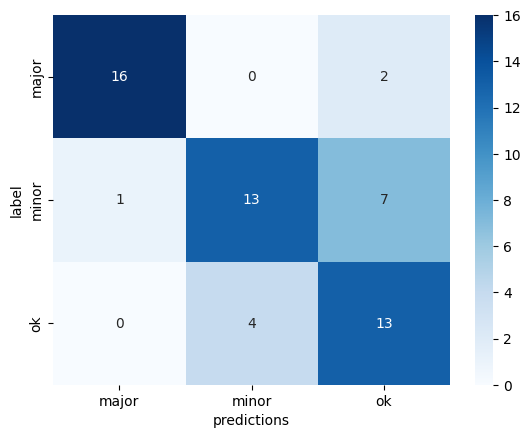

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

# create confusion matrix
confusion_matrix = pd.crosstab(results['label'], results['predictions'])

# plot confusion matrix
fig = plt.figure()
sns.heatmap(confusion_matrix, annot=True, cmap="Blues", fmt='d')

In [0]:
raw_images = (spark.read.table("smart_claims_dev.02_silver.claim_images")
                   .withColumn("damage_prediction", predict_damage_udf(*columns)))

metadata = spark.table("smart_claims_dev.01_bronze.claim_images_meta")

raw_images.join(metadata, on="image_name").write.mode('overwrite').saveAsTable("smart_claims_dev.03_gold.claim_images_predicted")